![](IMT.jpg)

- <b>Riahi Louriz
- Etudiant en Data Science à IMT Atlantique, campus Brest
- riahilouriz@gmail.com</b>

# Processing missing values

## Introduction :

"In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data."(<b>Wikipedia</b>).



Missing data is a very popular and challenging problem in data mining and machine learning. Data can be missed for many reasons which I will not cover here in the introduction, but to give a tangible example : "a person that we have questioned did not want to tell about his salary". We will explain all missing data mechanisms later on. As a consequence handling missing data is an important step in data mining since many algorithms can not support data with missing values. As a fruit we have a good accuracy and so a good decision making.

This lab will be composed of two major parts : a part that talks about the fundamentals of missing values and a practical part where we will study an example in detail.

## Part 1 :

Before I begin missing data mechanism, I would like to start by giving a small overview of missing data :Missing data can exist either in features or in the label( supervised learning). When missing data is in the label, we call the problem : <b> semi-supervised learning</b> which is beyond the scope of this lab. Whereas, if the missing values occur in the data features we have two cases : either those values can be processed automatically without any preprocessing for those missing data ( xgboost, decision tree, random forest, k-Nearest Neighbors) or the seconde case those missed values need to be processed  carefully.

### Missing Data Mechanism 

Preprocessing missing data is firstly knowing the reasons behind those missed values. In the next paragraph we are going to highlight different missing data mechanism with  interesting examples. Let's learn something new !

#### 1. MAR: Missing At Random 

If the probability of absence is related to one or
several other variables observed, we talk about missingness at random
(MAR).[4] Missed value has nothing to do with the actual column but other columns. In order to clarify this mechanism, let's illustrate it :

In [1]:
import pandas as pd
import numpy as np
mar = pd.DataFrame({'width':[10, 12, np.nan, 14, 15, 16,17,18, 19, np.nan, 21], 
                    'depth': [10, 20, np.nan, 40, 50, 60,np.nan, 80, 90, 100, 110],
                   'length' : [10, 20, np.nan, 40, 50, 60, 70, 80, 90, 100, 110],
                   'volume':[10, 20, np.nan, 40, 50, 60, np.nan, 80, 90, np.nan, 110],
                   'area':[10, 20, np.nan, 40, 50, 60, np.nan, 80, 90, np.nan, 110.]}) 
mar

,area,depth,length,volume,width
0,10.0,10.0,10.0,10.0,10.0
1,20.0,20.0,20.0,20.0,12.0
2,NaN,NaN,NaN,NaN,NaN
3,40.0,40.0,40.0,40.0,14.0
4,50.0,50.0,50.0,50.0,15.0
5,60.0,60.0,60.0,60.0,16.0
6,NaN,NaN,70.0,NaN,17.0
7,80.0,80.0,80.0,80.0,18.0
8,90.0,90.0,90.0,90.0,19.0
9,NaN,100.0,100.0,NaN,NaN


The example above shows the MAR mechanism : The area and the volume depend on width,length and depth( only volume). So when one of those features is missed obviously area and volume will be missed. That's why we say that having a missed value in volume depend on the abscence or presence of a value on other features.

#### 2. MCAR : Missing Completely at Random 

A data in a variable is said to be MCAR, if the probability of absence is the same for all observations. This probability does depend  only on external parameters independent of this variable[4]. An example to explicate better :

In [2]:
mcar = pd.DataFrame({'sea_surface_temperature':[10, 12, np.nan, 14, 15, 16,17,18, np.nan, np.nan, 21], 
                    'wind_speed': [np.nan, 2,2.1, 4, 5, 6,np.nan, 0.8, 0.9, 0.10, 2.25],
                   }) 
mcar

,sea_surface_temperature,wind_speed
0,10.0,NaN
1,12.0,2.00
2,NaN,2.10
3,14.0,4.00
4,15.0,5.00
5,16.0,6.00
6,17.0,NaN
7,18.0,0.80
8,NaN,0.90
9,NaN,0.10


Satellites used to measure climatic variables sometimes fail to capture information because of a technical problem of a certain radar.

<b>Note</b> : if the percentage of MCAR values is very small, delete those values will not affect your analysis.


#### MNAR: Missing Not at Random 

The data is said to be  missing not at random (MNAR) if the probability of absence depends on the variable in
question[4].

In [3]:
mnar = pd.DataFrame({'salary':[40, 35, np.nan, 28, 45, np.nan,37,38, 39, np.nan, 21], 
                    'age': [20, 29,27, 43, 56, 50,35, 48, 49, 45, 25],
                   }) 
mnar

,age,salary
0,20,40.0
1,29,35.0
2,27,NaN
3,43,28.0
4,56,45.0
5,50,NaN
6,35,37.0
7,48,38.0
8,49,39.0
9,45,NaN


This exampe is very popular when a person rejects to tell about his salary.

---
Until now you have explored  mechanisms behind missing values. I hope that you have got a full idea about the importance of this issue in data mining and machine learning. As a Data Scientist, you must always ask questions about the reasons behind missing values because only people who understand the job and the context can answer you. As a result of grasping those reasons you will be able to choose the best methods to impute missing data.

---

Let's go deeper and see what are the solutions to deal with missing values :

### Analysis without completion

#### Data deletion methods

In this case we are not interested in imputing missing values but just delete them. In other words, we delete all rows which have missing values. many drawbakcs can be drawn from this methods but I prefer two of them :
    1. We risk to delete a lot of data 
    2. If missing data not MCAR we risk to have a sample which is not representatif of the original sample. 


<b> Example :</b> Using our mcar dataframe 

In [4]:
print('Original shape is :',mcar.shape)
print('After case deletion :',mcar.dropna().shape)
print('We have lost',round(100*(1-mcar.dropna().shape[0]/mcar.shape[0])),'% of the information')
mcar.dropna()

Original shape is : (11, 2)
After case deletion : (6, 2)
We have lost 45 % of the information


,sea_surface_temperature,wind_speed
1,12.0,2.00
3,14.0,4.00
4,15.0,5.00
5,16.0,6.00
7,18.0,0.80
10,21.0,2.25


#### Methods that tolerate missing data

There are some algorithms that tolerate with missing data. So you do not need to perform any preprocessing or deleting missing data. Some of those algorithm, which I have found but you may find others of course : XGBOOST( see the last example in this lab), Decision trees, Random Forests and KNN.

#### Imputation methods

If your missing data is not MCAR and the algorithm that you want to use  can not support missing data, What can you do ? This is the objectif of this part. I will not list all methods that exist but I will try to headnote some of them and when to use depending on situations :

##### Mean, Median and Mode Imputation : 

Using the measures of central tendency involves replacing the missing values with the mean or median for numerical features and the mode for categorical features. The major limitation of using this method is that it leads to biased estimates of the variances and covariance. This imputation technique <b>works well</b> when the values are missing completely at random. [1]

##### k-Neareast Neighbor (kNN) Imputation :

For k-Nearest Neighbor imputation, the missing values are based on a kNN algorithm. These values are obtained by using similarity-based methods that rely on distance metrics (Euclidean distance, Jaccard similarity, Minkowski norm etc). They can be used to predict both discrete and continuous attributes. The main disadvantage of using kNN imputation is that it becomes time-consuming when analyzing large datasets because it searches for similar instances through all the dataset. <b>fancyimpute.kNN(k=x).complete(data matrix)</b> can be used for kNN imputation. Choosing the correct value for the number of neighbors (k) is also an important factor to consider when using kNN imputation. <b>This methods can perform well on MAR data.</b> [1]

##### Multiple Imputation using MICE (Multiple Imputation by Chained Equations)  :


Multiple imputation is a process where the missing values are filled multiple times to create "complete" datasets. Multiple imputation has a lot of advantages over traditional single imputation methods. Multiple Imputation by Chained Equations (MICE) is an imputation method that <b>works with the assumption that the missing data are Missing at Random (MAR)</b>. Recall that for MAR, the nature of the missing data is related to the observed data but not the missing data. The MICE algorithm works by running multiple regression models and each missing value is modeled conditionally depending on the observed (non-missing) values. <b>fancyimpute.MICE().complete(data matrix)</b>  can be used for MICE implementation. [1]

## Part 2 : Application on a dataset  ( from Kaggle)

You can find all information about the dataset used below in the following link : https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

#### Required libraries 

In [5]:
#install required libraries :
!pip install missingno

  Running setup.py bdist_wheel for missingno ... - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/96/52/c5/eb988eb218ca6a1828822a44eded4c8d420c45ed7cee05d33c
Successfully built missingno
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import missingno as msno  # if you do not have this package try install it by running : !pip install missingno

#### Load data : 

In [7]:
diabetes=pd.read_csv('diabetes.csv')

In [8]:
# first 5 rows and the shape :
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# feature types : 
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# describe data :
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- As you can see our class is not balanced: 34.89% are predicted as '1' ( the positive class) and the rest as '0' ( the negative class)
- Range of values for features is different ( maybe some normalization will be mandatory in case of using some models like SVM and Neural Network)

###### The most important point is: by looking at the min we notice that some features have 0 min value which is impossible!

In the next part we are going to see how to identify missing values and mark them as missing values ( nan representation)

#### Mark missing values 

Let's inspect the min result in our previous descibe  method :

In [11]:
# you can use loc[] since diabetes.describe() is a dataframe
diabetes.describe().loc['min',]

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

As said before,  there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

Specifically, the following columns have an invalid zero minimum value(it is the context that implies these remarks ):

    1: Plasma glucose concentration
    2: Diastolic blood pressure
    3: Triceps skinfold thickness
    4: 2-Hour serum insulin
    5: Body mass index

Now, let's mark missing values by giving them the right representation. In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN. Values with a NaN value are ignored from operations like sum, count, etc.

In [12]:
# mark zero values as missing or NaN
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)
# count the number of NaN values in each column
print(diabetes.isnull().sum())
# print the first 10 rows to check that '0's were replaced by NaN
diabetes.head(10)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


We can see that columns Glucose,BloodPressure and BMI have just a few zero values, whereas columns SkinThickness and Insulin show a lot more, approximately half of the rows.
This highlights that different missing values strategies may be needed for different columns, e.g. to ensure that there are still a sufficient number of records left to train a predictive model

#### Data missing visualization :

Let's see a simple matrix visualization for the missing values involved in our dataset : 

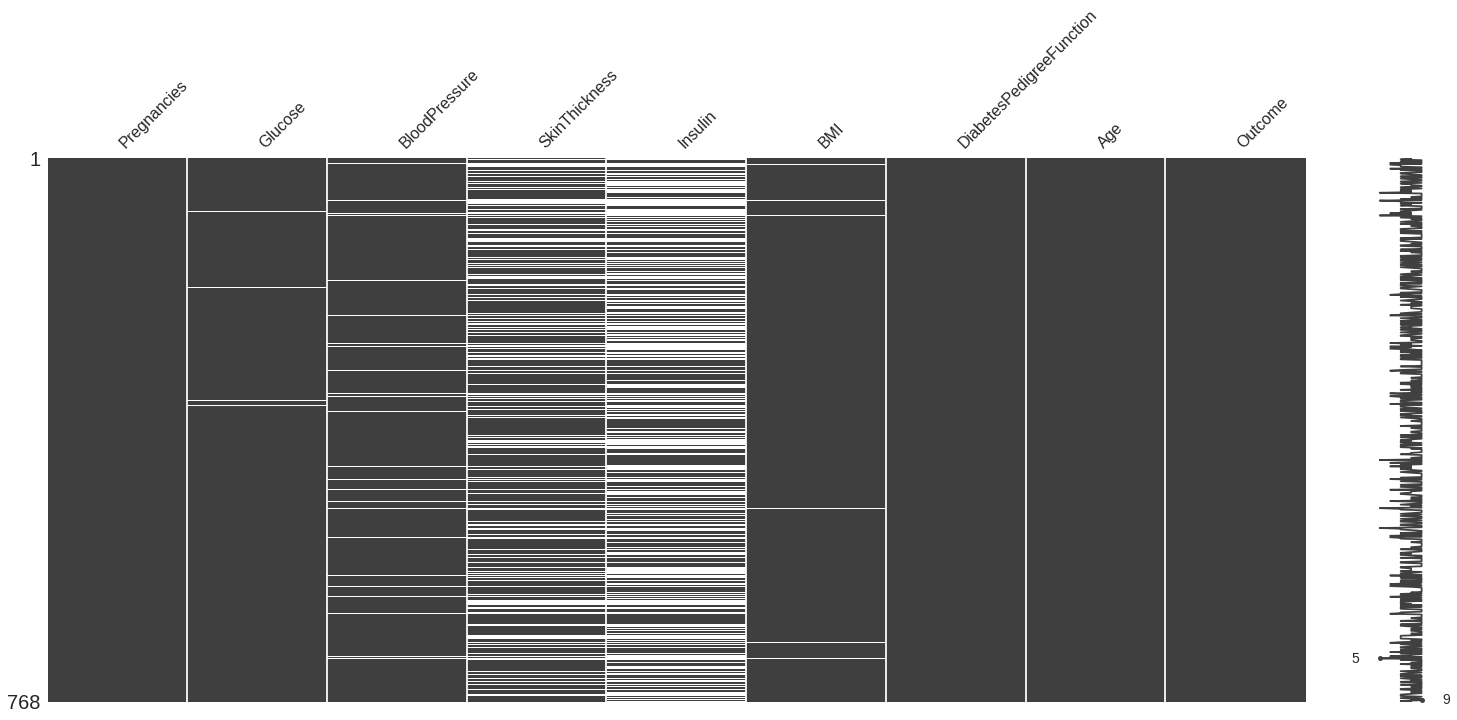

In [13]:
msno.matrix(diabetes)

It is very clear that Insulin and SkinThickness have a lot of missing values.

Another way to visualize the completeness of your data is to use bar plot as follow :

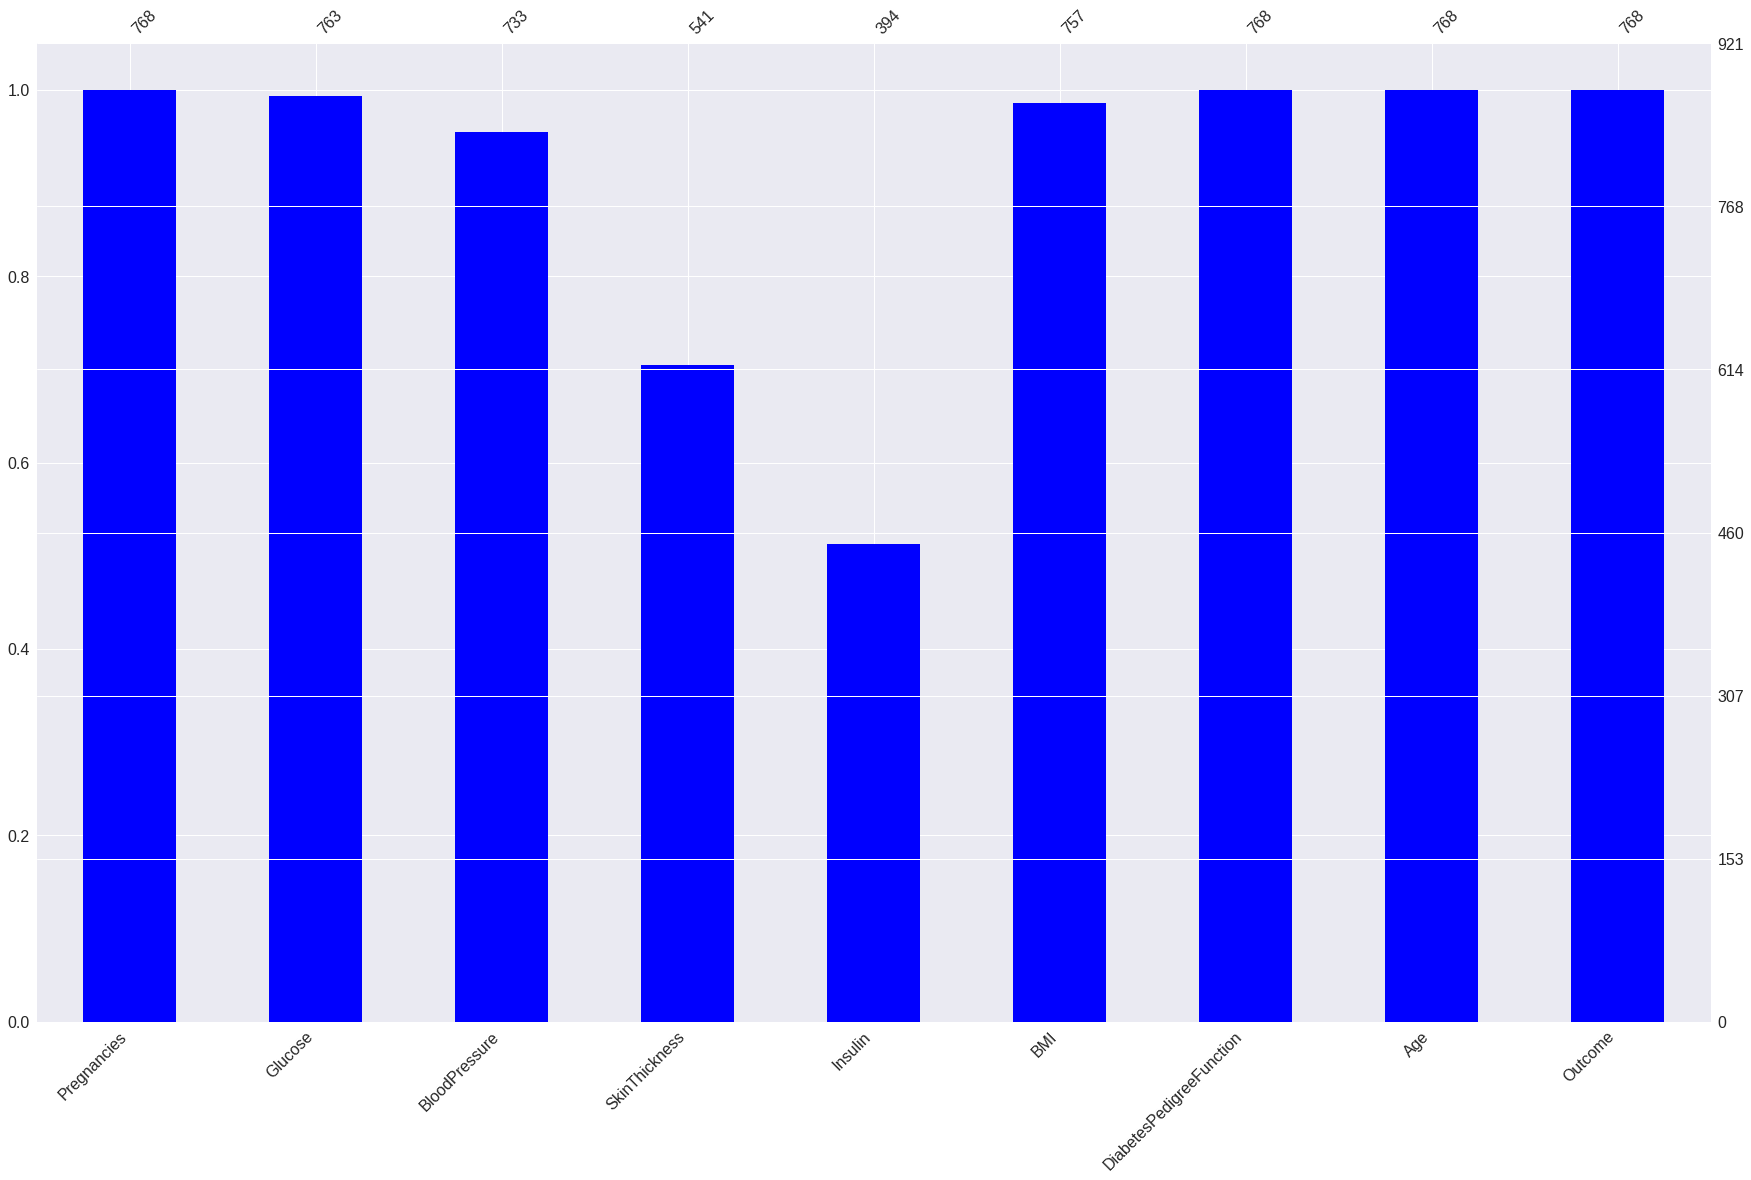

In [14]:
msno.bar(diabetes, color="blue", figsize=(30,18))

A simple correlation heatmap is shown below. This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1). Features with no missing value are excluded in the heatmap( e.g : Age). If the nullity correlation is very close to zero (-0.05 < R < 0.05)(e.g : Glucose vs Glucose), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values (MAR) while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing (MNAR).

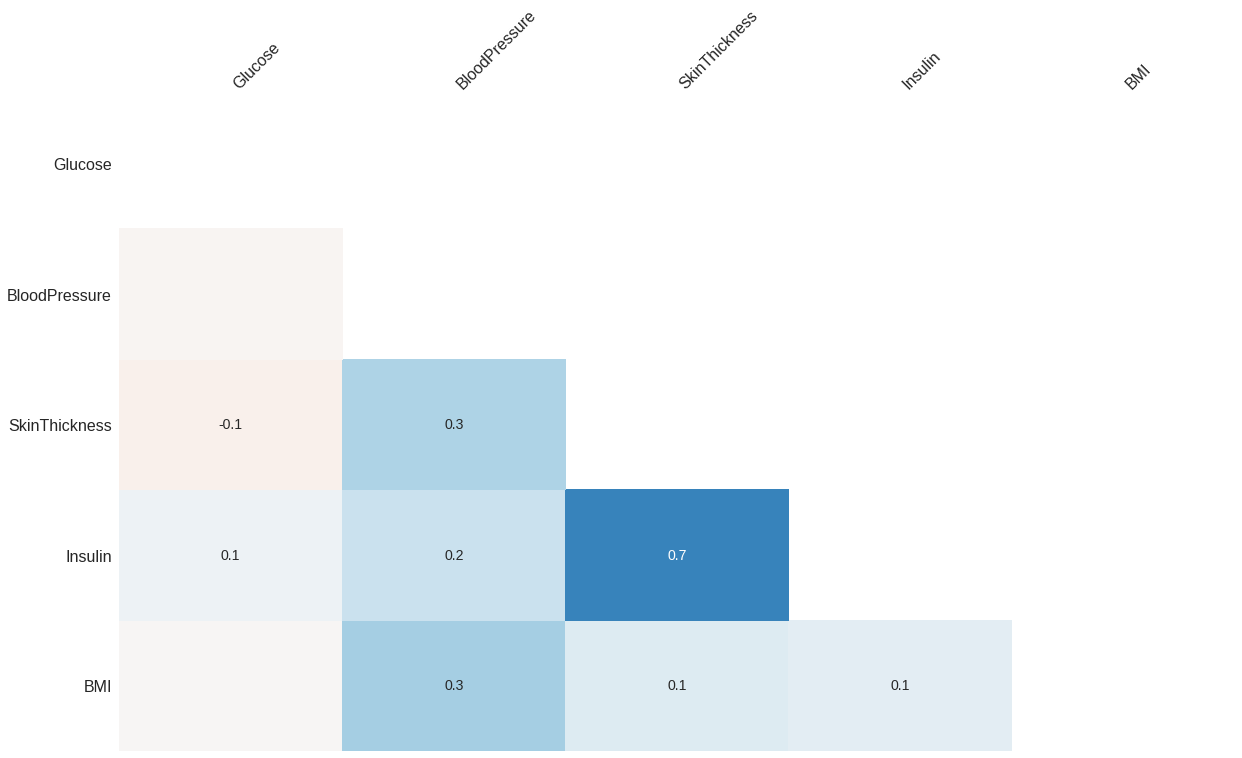

In [15]:
msno.heatmap(diabetes)

The above plot is not possible for big datasets, to overcome this issue you can use dendograms :

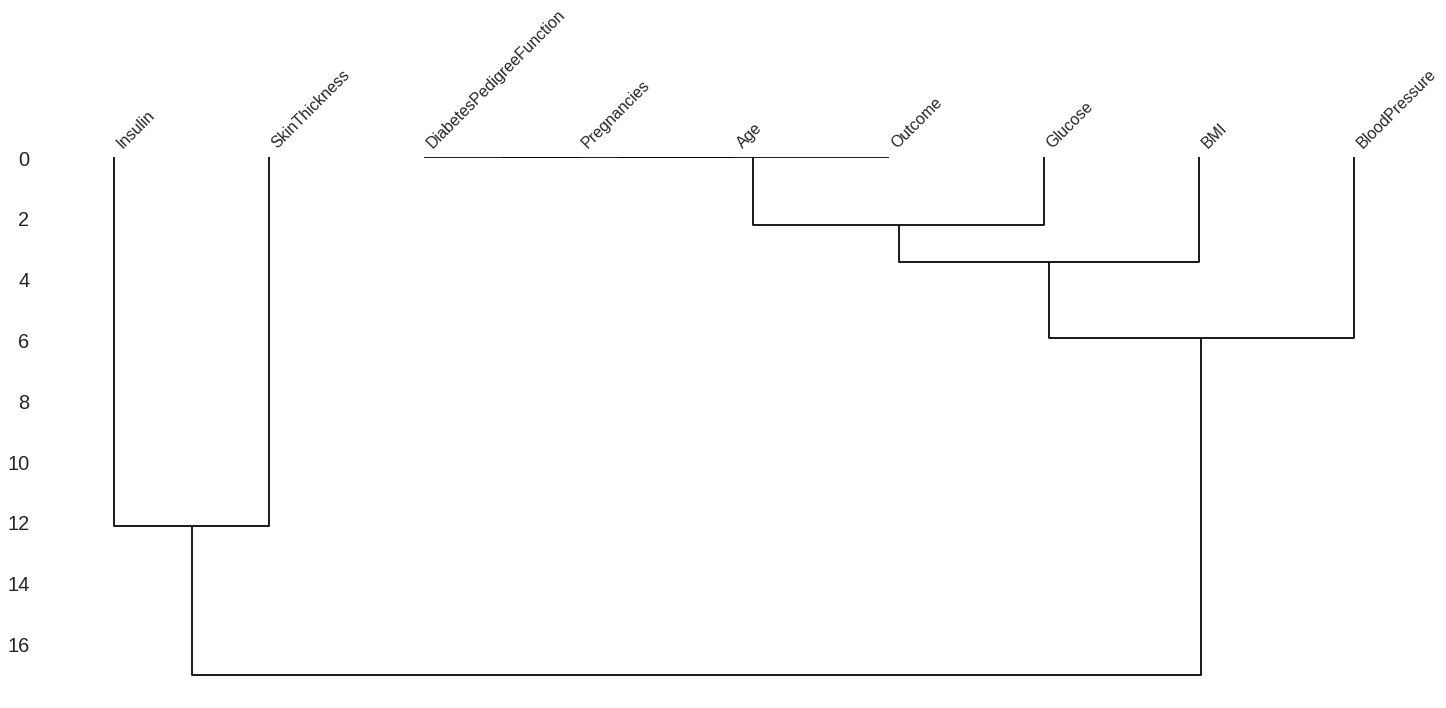

In [16]:
msno.dendrogram(diabetes) # Fits a `scipy` hierarchical clustering algorithm to the given DataFrame's variables and 
#visualizes the results as a `scipy` dendrogram.
# It like what you have seen in clusetring methods.

---
Untill now, we have explored how to identify missing values and how to give them the right representation (NaN). In the next part we are going to see how missing data can cause problems during our modeling. 


---


#### Problems with missing data :

Modeling using a dataset with missing values can cause problems for some models.

###### Runnig a SVC classifier: 

In [17]:
# split data into input X and output y
values = diabetes.values  # array form
X = values[:,0:8]
y = values[:,8]

In [18]:
from sklearn.svm import SVC
#svm = SVC(kernel='rbf', C=1).fit(X, y)
#svm.score(X, y)

- Remove the comment and run the cell above to see the result.
- We got an error and it is exactly what we expected, because there are NaN values in our data which SVC can not handle.


Now we are going to handle those missing values. As described above. We have multiple mechanism for missing data and each mechanism needs its suitable methods for imputing data. In the following part, we are going to explore multiple ways to imput missing data and compare the performance of each one. Let's Learn something new :) :

#### Remove Rows with missing data :

Refer to Data deletion methods section for more information about this method.

<b>Pandas</b> provides the dropna() function that can be used to drop either columns or rows with missing data. 

<b>We can use dropna() to remove all rows with missing data, as follows:</b>

In [19]:
# drop rows with missing values
diabetes.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(diabetes.shape)

(392, 9)


Obviously, the number of rows has been decreased sharply from 768 to 392. 
<b>===></b> Removing all rows with at least one missing value is not a good idea in case having only a small training dataset.

###### SVC classifier :

In [20]:
from sklearn.svm import SVC
# prepare input and output data :
values = diabetes.values
X = values[:,0:8]
y = values[:,8]
# SVC with linear kernel and C=1
svm = SVC(kernel='linear', C=1)
# cross validation method 
kfold = KFold(n_splits=3, random_state=7)
# note I have used recall and accuracy as scoring metric 
# ( you can use also precision, F-score, ..)
# by default recall score is computed for the label '1' which is in
# our case the minority class
result_recall = cross_val_score(svm, X, y, cv=kfold, scoring='recall')
result_accuracy = cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')

print('Recall :',result_recall.mean())
print('Accuracy: ', result_accuracy.mean())

Recall : 0.563562091503
Accuracy:  0.778195341554


Good! The accuracy outperforms the dummy classifier accuracy (66%). Also for the recall we have an interesting result of 56%. However, eliminating missing data degrades the results for some models. Let's see the effect of deleting columns with missing data.

<b>We can use dropna() to remove all columns with missing data that  exceeds a defined threshold, as follows:</b>

In [21]:
# diabetes is now without any missing values, so we will load again data
# and prepare it as before :
diabetes=pd.read_csv('diabetes.csv')
# mark zero values as missing or NaN
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)
# delete columns with missing values with a defined threshold fraction ( here 1.0*len(diabetes))
#( it means : Keep only the columns that contains 100% rows without missing values) :
# Because i am using SVC i am obliged to use  a fraction of 100%, otherwise
# the resulting data can have NaN values which is not supported by SVC.
frac = len(diabetes) * 1
diabetes.dropna(thresh=frac, axis=1,inplace=True)
# summarize the number of rows and columns in the dataset
print(diabetes.shape)

(768, 4)


In [22]:
# first 2 rows to inspect the new data 
diabetes.head(2)

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,6,0.627,50,1
1,1,0.351,31,0


###### SVC classifier: 

In [23]:
from sklearn.svm import SVC
# prepare input and output data :
values = diabetes.values
X = values[:,0:3]
y = values[:,3]
# SVC with linear kernel and C=1
svm = SVC(kernel='linear', C=1)
# cross validation method 
kfold = KFold(n_splits=3, random_state=7)

result_recall = cross_val_score(svm, X, y, cv=kfold, scoring='recall')
result_accuracy = cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')

print('Recall :',result_recall.mean())
print('Accuracy: ', result_accuracy.mean())

Recall : 0.143978211697
Accuracy:  0.641927083333


Results can say more what I can give as a comment. Now you have a full idea about the need to process missing data and not to throw them simply with dropna() function. 

### Impute Missing Values

Impute missing values is not an easy task, because it depends on many criterias such as the domain, the reasons behind missing values etc .
 In the next part, we are going to explore different ways for imputing missing values and compute the performance on each resulting dataset. ( Refer to sections above about how to impute missing data to know more about those methods). 

<b>When imputing missing values, there many options to take such as :</b>
    

- Replace missing values by a constant value that has meaning in the domain.
- A value estimated by another predictive model
- A mean,median or mode value.
- A value from another randomly selected record.

#### Imputing using the mean,median,mode( for categorical variables) :

Using the measures of central tendency involves substituting the missing values with the mean or median for numerical variables and the mode for categorical variables. The major limitation of using this method is that it leads to biased estimates of the variances and covariance. The standard errors and test statistics can also be underestimated and overestimated respectively. <b>This imputation technique works well with when the values are Missing Completely at Random (MCAR)</b>. Scikit-learn comes with an imputed function in the form <b>sklearn.preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)</b>. Strategy is the imputation strategy and the default is the "mean" of the axis (0 for columns and 1 for rows). The other strategies are "median" and "most_frequent".

In [24]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
# you can use for the strategy either median, mean,mostfrequent

In [25]:
#load again the data and preprocess it.
diabetes=pd.read_csv('diabetes.csv')
# mark zero values as missing or NaN
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)
## fill missing values by the mean of the colmun concerned :
imp.fit(diabetes)
imputed_diabetes=imp.transform(diabetes)



#### SVC classifier :

In [26]:
from sklearn.svm import SVC
# prepare input and output data :

X = imputed_diabetes[:,0:8]
y = imputed_diabetes[:,8]
# SVC with linear kernel and C=1
svm = SVC(kernel='linear', C=1)
# cross validation method 
kfold = KFold(n_splits=3, random_state=7)

result_recall = cross_val_score(svm, X, y, cv=kfold, scoring='recall')
result_accuracy = cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')

print('Recall :',result_recall.mean())
print('Accuracy: ', result_accuracy.mean())

Recall : 0.551460357027
Accuracy:  0.763020833333


<mark>Results are quit good but less than deleting all rows with missing values as we have already performed. Do not worry, now we are trying to highlight different strategies. The best one depends on the context and how the data was missed( MCAR, MAR and MNAR). As I have mentionned before imputing missing values with mean, median etc works well with MCAR data, but if you go back to data missing visualization you can find out that it is not the case here.</mark>

#### k-Neareast Neighbor (kNN) Imputation :

For k-Nearest Neighbor imputation, the missing values are based on a kNN algorithm. These values are obtained by using similarity-based methods that rely on distance metrics (Euclidean distance, Jaccard similarity, Minkowski norm etc). They can be used to predict both discrete and continuous attributes. The main disadvantage of using kNN imputation is that it becomes time-consuming when analyzing large datasets because it searches for similar instances through all the dataset. fancyimpute.kNN(k=x).complete(data matrix) can be used for kNN imputation. Choosing the correct value for the number of neighbors (k) is also an important factor to consider when using kNN imputation.

In [27]:
#install required packages : we will use fancyimpute package
!pip install fancyimpute

    100% |████████████████████████████████| 163kB 5.1MB/s 
    100% |████████████████████████████████| 3.1MB 344kB/s 
    100% |████████████████████████████████| 122kB 7.7MB/s 
    100% |████████████████████████████████| 286kB 3.6MB/s 
    100% |████████████████████████████████| 1.5MB 791kB/s 
    100% |████████████████████████████████| 51kB 7.2MB/s 
    100% |████████████████████████████████| 696kB 1.6MB/s 
    100% |████████████████████████████████| 71kB 7.8MB/s 
    100% |████████████████████████████████| 71kB 10.0MB/s 
  Running setup.py bdist_wheel for fancyimpute ... - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/9d/78/a49d65bb66557f705de636d1a21f9310993a4342670add3f9e
  Running setup.py bdist_wheel for knnimpute ... - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/66/a0/1c/ed41cf540d0bd6d4ae368e9554b77753da154e7d8974c4435f
  Running setup.py bdist_wheel for cvxpy ... - \ | / - \ | / done
  Stored in directory: /hom

I will begin by explaining a short example on how to use fancyimpute package in order to impute missing values :

In [28]:
#import required libraries :
from fancyimpute import KNN
#Create a simple dataframe with missing values :
df = pd.DataFrame({'feature1':[10, 12, np.nan, 14, 15, 16, 17, 18, 19, np.nan, 21], 
                    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110.]}) 

df

,feature1,feature2
0,10.0,10.0
1,12.0,20.0
2,NaN,30.0
3,14.0,40.0
4,15.0,50.0
5,16.0,60.0
6,17.0,70.0
7,18.0,80.0
8,19.0,90.0
9,NaN,100.0


In [29]:
#use KNN to impute missing values
X_filled_knn = KNN(k=3).complete(df)  # k=3  Number of neighboring rows to use for imputation.
# See results :
X_filled_knn

Imputing row 1/11 with 0 missing, elapsed time: 0.002


array([[  10.        ,   10.        ],
       [  12.        ,   20.        ],
       [  12.66666693,   30.        ],
       [  14.        ,   40.        ],
       [  15.        ,   50.        ],
       [  16.        ,   60.        ],
       [  17.        ,   70.        ],
       [  18.        ,   80.        ],
       [  19.        ,   90.        ],
       [  19.77777819,  100.        ],
       [  21.        ,  110.        ]])

<b>End of the example</b>

Let's go back to our data :

In [30]:
#load again the data and preprocess it.
diabetes=pd.read_csv('diabetes.csv')
# mark zero values as missing or NaN
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)
## fill missing values by using KNN approach :

diabetes_filled_knn=KNN(k=3,orientation='columns').complete(diabetes)

Imputing row 1/9 with 0 missing, elapsed time: 0.002


#### SVC classifier :

In [31]:
X=diabetes_filled_knn[:,0:8]
y=diabetes_filled_knn[:,8]
# SVC with linear kernel and C=1
svm = SVC(kernel='linear', C=1)
# cross validation method 
kfold = KFold(n_splits=3, random_state=7)

result_recall = cross_val_score(svm, X, y, cv=kfold, scoring='recall')
result_accuracy = cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')

print('Recall :',result_recall.mean())
print('Accuracy: ', result_accuracy.mean())

Recall : 0.550415596234
Accuracy:  0.759114583333


I hope the above examples gave you an interesting idea about how to use the fancyimpute package in order to impute missing values.

#### Multiple Imputation using MICE (Multiple Imputation by Chained Equations)

Multiple imputation is a process where the missing values are filled multiple times to create "complete" datasets. Multiple imputation has a lot of advantages over traditional single imputation methods.<b> Multiple Imputation by Chained Equations (MICE) is an imputation method that works with the assumption that the missing data are Missing at Random (MAR)</b>. Recall that for MAR, the nature of the missing data is related to the observed data but not the missing data. The MICE algorithm works by running multiple regression models and each missing value is modeled conditionally depending on the observed (non-missing) values. For that we will use : <b>fancyimpute.MICE().complete(data matrix)</b> can be used for MICE implementation.

In [32]:
from fancyimpute import MICE
#load again the data and preprocess it.
diabetes=pd.read_csv('diabetes.csv')
# mark zero values as missing or NaN
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)
## fill missing values by using MICE approach :
mice_diabetes=MICE().complete(diabetes.values)

[MICE] Completing matrix with shape (768, 9)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.046
[MICE] Starting imputation round 3/110, elapsed time 0.064
[MICE] Starting imputation round 4/110, elapsed time 0.083
[MICE] Starting imputation round 5/110, elapsed time 0.097
[MICE] Starting imputation round 6/110, elapsed time 0.112
[MICE] Starting imputation round 7/110, elapsed time 0.129
[MICE] Starting imputation round 8/110, elapsed time 0.147
[MICE] Starting imputation round 9/110, elapsed time 0.164
[MICE] Starting imputation round 10/110, elapsed time 0.183
[MICE] Starting imputation round 11/110, elapsed time 0.200
[MICE] Starting imputation round 12/110, elapsed time 0.215
[MICE] Starting imputation round 13/110, elapsed time 0.243
[MICE] Starting imputation round 14/110, elapsed time 0.253
[MICE] Starting imputation round 15/110, elapsed time 0.270
[MICE] Starting imputation round 16/110, elapsed time 0.285
[MIC

In [33]:
mice_diabetes

array([[   6.   ,  148.   ,   72.   , ...,    0.627,   50.   ,    1.   ],
       [   1.   ,   85.   ,   66.   , ...,    0.351,   31.   ,    0.   ],
       [   8.   ,  183.   ,   64.   , ...,    0.672,   32.   ,    1.   ],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,    0.245,   30.   ,    0.   ],
       [   1.   ,  126.   ,   60.   , ...,    0.349,   47.   ,    1.   ],
       [   1.   ,   93.   ,   70.   , ...,    0.315,   23.   ,    0.   ]])

In [34]:
# Library for scaling data ( as you know SVM needs normalization)
from sklearn import preprocessing
# prepare vectors: features and label
X_train=mice_diabetes[:,0:8]
y=mice_diabetes[:,8]
# scale features
X_train_scale=preprocessing.scale(X_train)

# SVC with linear kernel and C=1
svm = SVC(kernel='linear', C=1)
# cross validation method 
kfold = KFold(n_splits=3, random_state=7)

result_recall = cross_val_score(svm, X_train_scale, y, cv=kfold, scoring='recall')
result_accuracy = cross_val_score(svm, X_train_scale, y, cv=kfold, scoring='accuracy')

print('Recall :',result_recall.mean())
print('Accuracy: ', result_accuracy.mean())

Recall : 0.558877781829
Accuracy:  0.768229166667


### Algorithms That handles missing data 

As I have already said, there are algorithms that handle missing data with doing any preprocessing. One of those algorithm is XGBOOSt.

In [37]:
#install xgboosr using pip :
!pip install xgboost

    100% |████████████████████████████████| 1.2MB 857kB/s 
  Running setup.py bdist_wheel for xgboost ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /home/jovyan/.cache/pip/wheels/5e/c1/d6/522af54e5cc001fad4dd855117f8bf61b11d56443e06672e26
Successfully built xgboost
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [40]:
#Required libraries :
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
# load data
diabetes=pd.read_csv('diabetes.csv')
# mark zero values as missing or NaN
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)
# split data into X and y
X = diabetes.values[:,0:8]
Y = diabetes.values[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))

Accuracy: 76.77%
Recall: 65.22%


# Conclusion :

This lab highlights the importance of preprocessing missing data in data mining and machine learning. The first part was about the mechanisms behind missing values which are: MAR, MNAR and MCAR. Those mechanisms push the Data Scientist to be very careful about this issue and to refer to persons that understand the context of the mission. I have also provided an overview of some solutions in order to deal with missing values. The seconde part was full of application on a dataset taken from Kaggle. During this part you have explored some data exploration, how to identify and mark missing values, some visualizations that help you to take a fast idea about the interaction between different columns regarding their missing values. 

# Bibliography

- [1] http://datascience.ibm.com/blog/missing-data-conundrum-exploration-and-imputation-techniques/ 
- [2] http://scikit-learn.org/stable/modules/preprocessing.html#imputation

- [3] https://machinelearningmastery.com/handle-missing-data-python/
- [4] https://www.math.univ-toulouse.fr/~besse/Wikistat/